In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('/content/Data.csv')
display(df.head(10))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [13]:
# Data cleaning - handle missing values
df['Distance_from_Home'].fillna('Moderate', inplace=True)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

display(df.isnull().sum())

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [19]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

for col in categorical_cols:
    le = LabelEncoder()  # Create a new LabelEncoder instance
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store the encoder for potential inverse transformation later

# **Visualization**

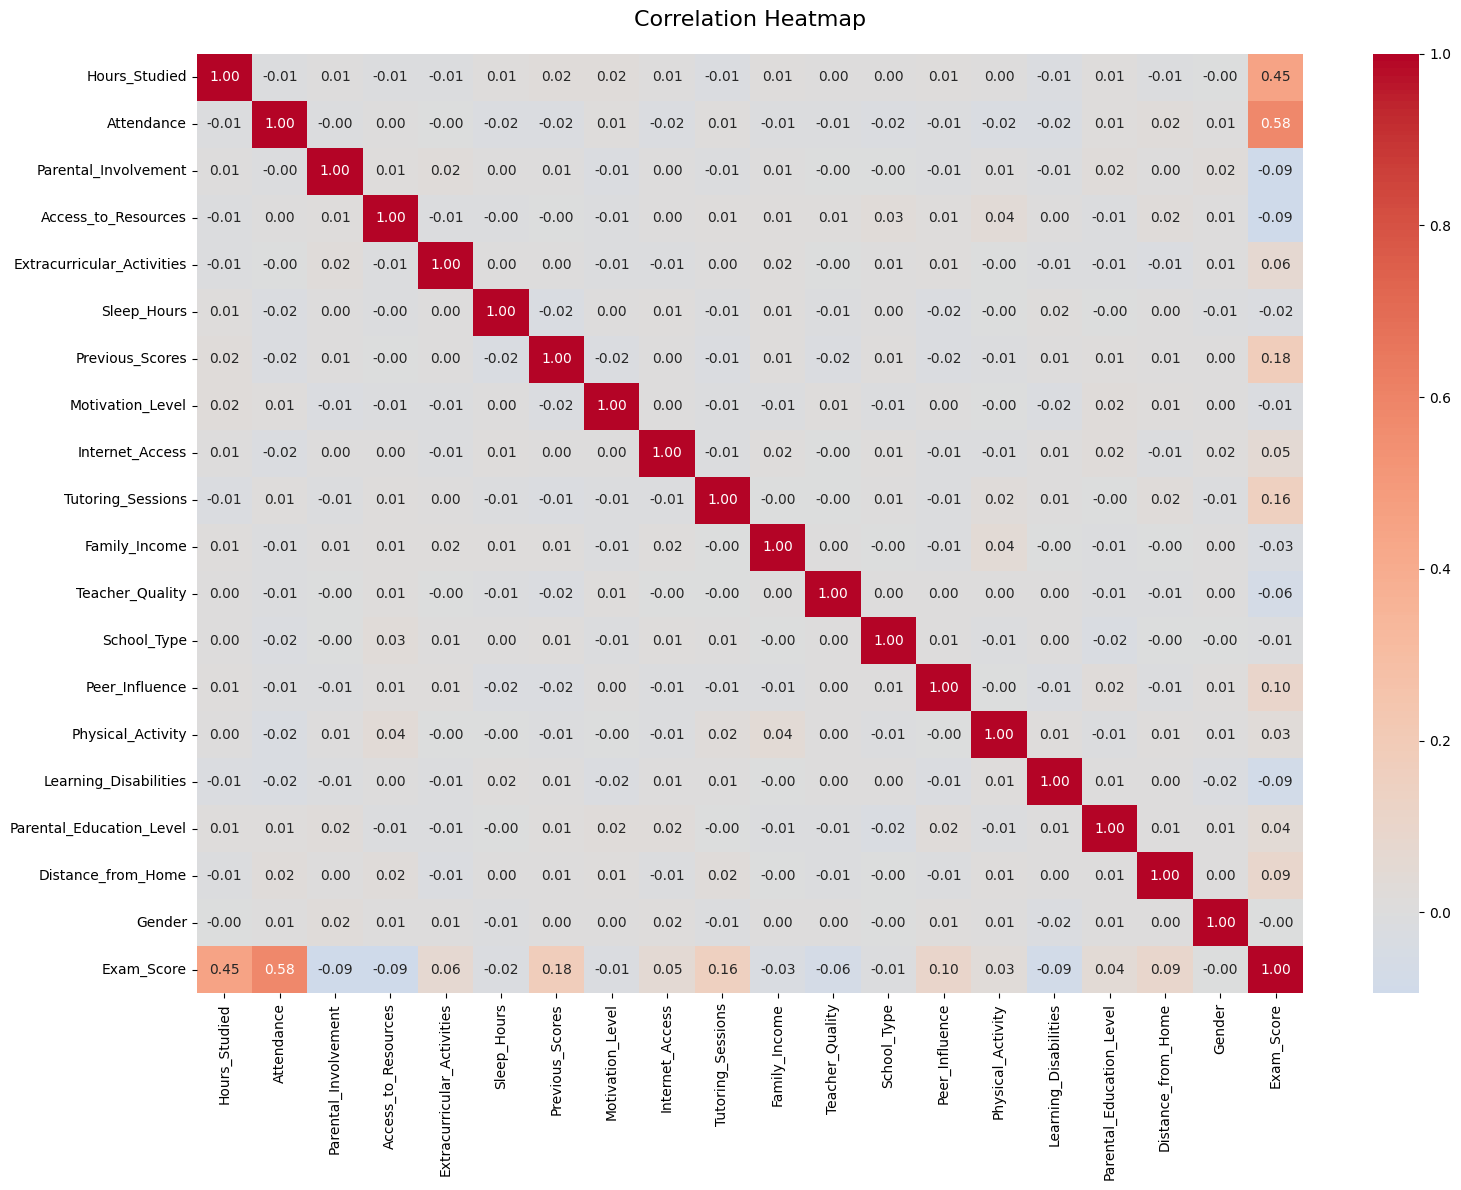

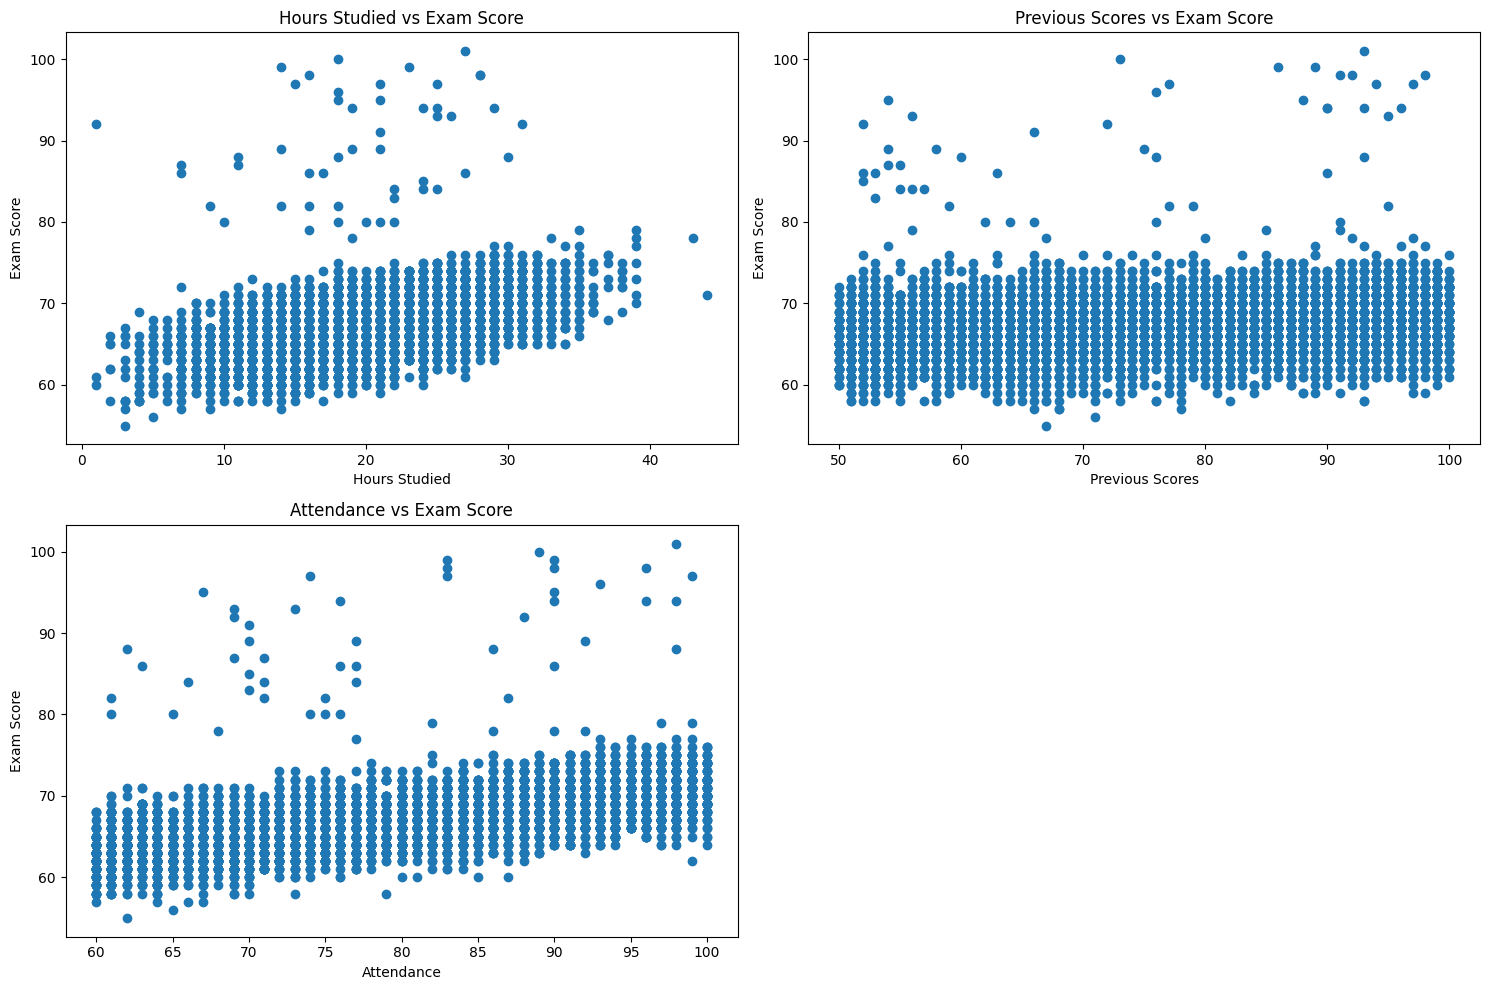

In [59]:
# Create a separate figure just for the heatmap
plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            annot_kws={'size': 10}, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Then create the other visualizations in a separate figure
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')

plt.subplot(2, 2, 2)
plt.scatter(df['Previous_Scores'], df['Exam_Score'])
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Previous Scores vs Exam Score')

plt.subplot(2, 2, 3)
plt.scatter(df['Attendance'], df['Exam_Score'])
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attendance vs Exam Score')

plt.tight_layout()
plt.show()

# **Train linear Regression model**

In [60]:
# Split the data into features and target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Linear Regression Results:
Mean Squared Error: 4.40
R-squared: 0.69


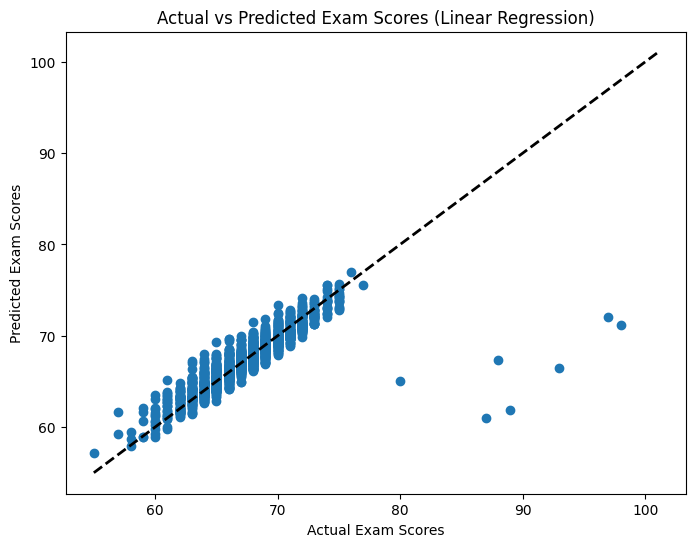

In [72]:
# Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Linear Regression)')
plt.show()

# **polynomial** **regression**

In [73]:
# Bonus: Try polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("\nPolynomial Regression Results:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")


Polynomial Regression Results:
Mean Squared Error: 3.41
R-squared: 0.76


In [74]:
# Compare feature combinations
# Model with only hours studied
X_simple = df[['Hours_Studied']]
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)
y_pred_simple = simple_model.predict(X_test_simple)

mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("\nSimple Model (Only Hours Studied) Results:")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")



Simple Model (Only Hours Studied) Results:
Mean Squared Error: 10.86
R-squared: 0.23


In [75]:
# Model with top 3 features (based on correlation)
X_top3 = df[['Previous_Scores', 'Hours_Studied', 'Attendance']]
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

top3_model = LinearRegression()
top3_model.fit(X_train_top3, y_train_top3)
y_pred_top3 = top3_model.predict(X_test_top3)

mse_top3 = mean_squared_error(y_test_top3, y_pred_top3)
r2_top3 = r2_score(y_test_top3, y_pred_top3)

print("\nTop 3 Features Model Results:")
print(f"Mean Squared Error: {mse_top3:.2f}")
print(f"R-squared: {r2_top3:.2f}")


Top 3 Features Model Results:
Mean Squared Error: 5.34
R-squared: 0.62


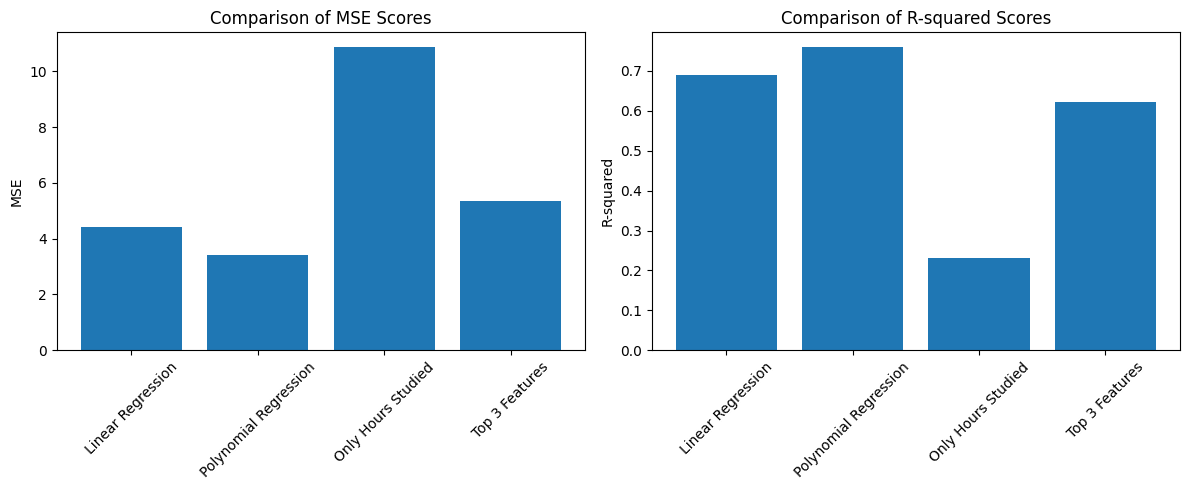

In [77]:
# Compare all models
models = ['Linear Regression', 'Polynomial Regression', 'Only Hours Studied', 'Top 3 Features']
mse_scores = [mse, mse_poly, mse_simple, mse_top3]
r2_scores = [r2, r2_poly, r2_simple, r2_top3]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_scores)
plt.title('Comparison of MSE Scores')
plt.xticks(rotation=45)
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores)
plt.title('Comparison of R-squared Scores')
plt.xticks(rotation=45)
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()